In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt

In [2]:
def joint_prob(u,v,r,m, px,py,pz):
    #u: X error, v Zerror, r syndrome with weight r, m number of repetitions
    first_term = (px+py)**(u*(m-2*r)+r)*(1-px-py)**((1-u)*(m-2*r)+r)
    second_term = (px-py)**(u*(m-2*r)+r)*(1-px-py-2*pz)**((1-u)*(m-2*r)+r)
    return 0.5*(first_term+(-1)**v*second_term)

In [3]:
def probability_of_a_syndrome(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    return joint_prob(0,0,r,m, px,py,pz)+joint_prob(0,1,r,m, px,py,pz)+joint_prob(1,0,r,m, px,py,pz)+joint_prob(1,1,r,m, px,py,pz)

In [4]:
def new_channel(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    prob_syndrome = probability_of_a_syndrome(r,m,px,py,pz)
    pI = joint_prob(0,0,r,m, px,py,pz)/prob_syndrome
    pZ = joint_prob(0,1,r,m, px,py,pz)/prob_syndrome
    pX = joint_prob(1,0,r,m, px,py,pz)/prob_syndrome
    pY = joint_prob(1,1,r,m, px,py,pz)/prob_syndrome
    return pI,pX,pY,pZ

In [5]:
def rate(p):
    pI = p[0]
    pX = p[1]
    pY = p[2]
    pZ = p[3]
    return 1+pI*np.log2(pI)+pX*np.log2(pX)+pY*np.log2(pY)+pZ*np.log2(pZ)

In [6]:
def concatenated_channel_rate(m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    concatenated_rate = 0
    for r in range(0,m):
        concatenated_rate += binom(m-1,r)*probability_of_a_syndrome(r,m,px,py,pz)*rate(new_channel(r,m,px,py,pz))
    return concatenated_rate/m

In [7]:


def get_best_rate(pX,pY,pZ):
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    best_rate = rate(pvec)
    best_number_of_repetitions = 1
    for repetitions in range(2,37):
        r = concatenated_channel_rate(repetitions,pX,pY,pZ)
        if r>=best_rate:
            best_rate = r
            best_number_of_repetitions = repetitions
    print(best_rate,best_number_of_repetitions)
    return best_rate


probz 0.2299999999999998 0.23
0.09506470943553091 1
probz 0.2310000000000001 0.231
0.09272289279250989 1
probz 0.23199999999999996 0.232
0.09038891884277095 1
probz 0.23300000000000037 0.233
0.08806276475402715 1
probz 0.23400000000000015 0.234
0.08574440792883121 1
probz 0.23500000000000035 0.23500000000000001
0.08343382600167253 1
probz 0.23599999999999977 0.23600000000000002
0.08113099683614532 1
probz 0.23700000000000004 0.23700000000000002
0.07883589852214273 1
probz 0.23800000000000018 0.23800000000000002
0.07654850937312503 1
probz 0.2389999999999999 0.23900000000000002
0.07426880792341199 1
probz 0.2399999999999997 0.24000000000000002
0.07199677292553065 1
probz 0.24099999999999963 0.24100000000000002
0.06973238334761135 1
probz 0.242 0.24200000000000002
0.06747561837082126 1
probz 0.2430000000000005 0.24300000000000002
0.06522645738684758 1
probz 0.24399999999999983 0.24400000000000002
0.06298487999541896 1
probz 0.24499999999999947 0.24500000000000002
0.060750866001862566 1
p

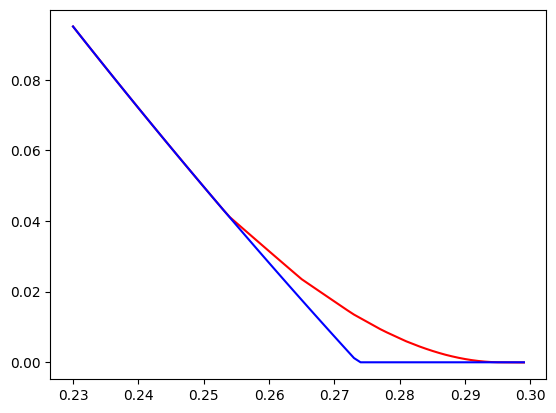

In [8]:
concatenated_best_rate = []
hashing_rate = []
prange =np.arange(0.23,0.3,0.001)
for p_total in prange:
    if (10-np.sqrt(100-36*p_total) >=0) and (10-np.sqrt(100-36*p_total)<=1):
        q = (10-np.sqrt(100-36*p_total))/18
    else:
        q = (10+np.sqrt(100-36*p_total))/18
    qx = 9*q
    qz = q
    pX = qx*(1-qz)
    pZ = qz*(1-qx)
    pY = qx*qz

    print('probz', pX+pY+pZ, p_total)
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    hashing_rate.append(max(rate(pvec),0))
    concatenated_best_rate.append(get_best_rate(pX,pY,pZ))
plt.plot(prange,concatenated_best_rate,'r')
plt.plot(prange,hashing_rate,'b')

/tmp/ipykernel_36521/1856837085.py:6: RuntimeWarning: divide by zero encountered in log2
  b1.append(1+p*np.log2(p)+(1-p)*np.log2(1-p))
/tmp/ipykernel_36521/1856837085.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  b1.append(1+p*np.log2(p)+(1-p)*np.log2(1-p))


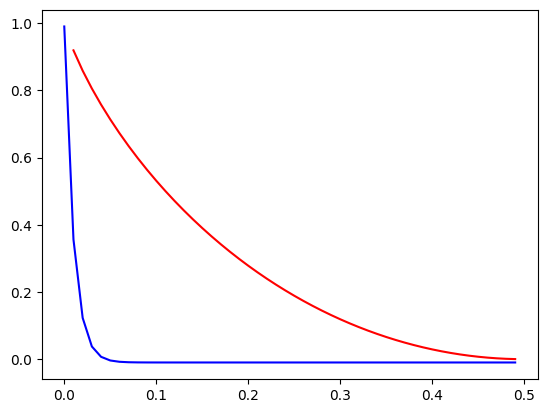